Step 1: Data Cleaning
Handle Missing Values

Check for missing values in the dataset.
Fill or drop missing values as appropriate.
Remove Duplicates

Ensure there are no duplicate rows.
Normalize Data Formats

Convert date columns to datetime objects.
Normalize categorical data.

Loads the data from the CSV files.

Cleans the TRANSACTION_LINE data by handling missing values, converting date columns, removing duplicates, and normalizing categorical data.

Cleans the USER_DATA by handling missing values, removing empty columns, removing duplicates, and normalizing categorical data.

Converts the DATE_OF_BIRTH column to a proper datetime format.

Displays the cleaned data for verification.


In [ ]:
import pandas as pd
import numpy as np

# Load the data
transaction_line = pd.read_csv('TRANSACTION_LINE.csv')
user_data = pd.read_csv('USER_DATA.csv')

# Data Cleaning for TRANSACTION_LINE

# Check for missing values
print(transaction_line.isnull().sum())

# Fill missing values or drop them based on context
transaction_line['CLOSED_DATE'].fillna('01-01-2099', inplace=True)

# Convert date columns to datetime objects
transaction_line['OPENING_DATE'] = pd.to_datetime(transaction_line['OPENING_DATE'], format='%d-%m-%Y')
transaction_line['LAST_PAYMENT_DATE'] = pd.to_datetime(transaction_line['LAST_PAYMENT_DATE'], format='%d-%m-%Y')
transaction_line['CLOSED_DATE'] = pd.to_datetime(transaction_line['CLOSED_DATE'], format='%d-%m-%Y')

# Remove duplicate rows, if any
transaction_line.drop_duplicates(inplace=True)

# Normalize categorical data (e.g., trimming whitespaces, converting to consistent case)
transaction_line['CATEGORY'] = transaction_line['CATEGORY'].str.strip().str.upper()
transaction_line['OWNERSHIP_TYPE'] = transaction_line['OWNERSHIP_TYPE'].str.strip().str.upper()
transaction_line['ACCOUNT_CATEGORY'] = transaction_line['ACCOUNT_CATEGORY'].str.strip().str.upper()
transaction_line['ACCOUNT_STATUS'] = transaction_line['ACCOUNT_STATUS'].str.strip().str.upper()

# Display cleaned data
print(transaction_line.head())

# Data Cleaning for USER_DATA

# Check for missing values
print(user_data.isnull().sum())

# Drop columns that are entirely empty (Unnamed columns)
user_data = user_data.loc[:, ~user_data.columns.str.contains('^Unnamed')]

# Fill missing values or drop them based on context
# For simplicity, let's fill missing phone numbers with a placeholder
user_data['PHONE_NUMBER'].fillna('UNKNOWN', inplace=True)

# Remove duplicate rows, if any
user_data.drop_duplicates(inplace=True)

# Normalize categorical data (e.g., trimming whitespaces, converting to consistent case)
user_data['FIRST_NAME'] = user_data['FIRST_NAME'].str.strip().str.title()
user_data['LAST_NAME'] = user_data['LAST_NAME'].str.strip().str.title()
user_data['EMAIL'] = user_data['EMAIL'].str.strip().str.lower()
#user_data['ADDRESS'] = user_data['ADDRESS'].str.strip().str.title()
user_data['ADDRESS'] = user_data['ADDRESS'].astype(str).str.strip().str.title()
user_data['CITY'] = user_data['CITY'].str.strip().str.title()
user_data['STATE'] = user_data['STATE'].str.strip().str.title()
user_data['COUNTRY'] = user_data['COUNTRY'].str.strip().str.title()

# Convert DATE_OF_BIRTH to datetime
user_data['DATE_OF_BIRTH'] = pd.to_datetime(user_data['DATE_OF_BIRTH'], format='%Y')

# Display cleaned data
print(user_data.head())

# Save cleaned data to new CSV files (optional)
transaction_line.to_csv('CLEANED_TRANSACTION_LINE.csv', index=False)
user_data.to_csv('CLEANED_USER_DATA.csv', index=False)

ROW_ID                   0
CUSTOMER_ID              0
FICO_SCORE               0
CATEGORY                 0
OWNERSHIP_TYPE           0
ACCOUNT_CATEGORY         0
ACCOUNT_STATUS           0
OPENING_DATE             0
LAST_PAYMENT_DATE        0
CLOSED_DATE          17153
HIGHEST_CREDIT           0
SANCTIONED_AMOUNT        0
ACCOUNT_BALANCE          0
TENURE_MONTHS            0
dtype: int64
       ROW_ID  CUSTOMER_ID  FICO_SCORE     CATEGORY OWNERSHIP_TYPE  \
0  1182579517      8374349         746  CATEGORY 04  JOINT ACCOUNT   
1  2622282257      8374349         777  CATEGORY 05     INDIVIDUAL   
2  4191255964      8374349         663  CATEGORY 04  JOINT ACCOUNT   
3  3232655817      8374349         767  CATEGORY 04  JOINT ACCOUNT   
4  7610587168      8374349         773  CATEGORY 02  JOINT ACCOUNT   

   ACCOUNT_CATEGORY ACCOUNT_STATUS OPENING_DATE LAST_PAYMENT_DATE CLOSED_DATE  \
0         GOLD LOAN         ACTIVE   2012-03-14        2016-02-07  2099-01-01   
1  TWO-WHEELER LOAN       

<ipython-input-1-f6c422f4066c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['PHONE_NUMBER'].fillna('UNKNOWN', inplace=True)
<ipython-input-1-f6c422f4066c>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.drop_duplicates(inplace=True)
<ipython-input-1-f6c422f4066c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['FIRST_NAME'] = user_data['FIRS

Exploratory Data Analysis (EDA)

Summary of Active vs. Closed Accounts

Count the number of active and closed accounts.
Breakdown of Account Types and Their Current Balances

Count and summarize the different types of accounts and their balances.
Analysis of Loan Amounts vs. Account Balances

Compare the sanctioned loan amounts with the remaining account balances.
Overview of the Closure Percentages for Different Loan Types by Ownership Type

Analyze the closure percentages for different loan types and ownership types.


ACCOUNT_STATUS
CLOSED    43228
ACTIVE    17153
Name: count, dtype: int64


<ipython-input-2-1697da2e1e4a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transaction_line, x='ACCOUNT_STATUS', palette='viridis')


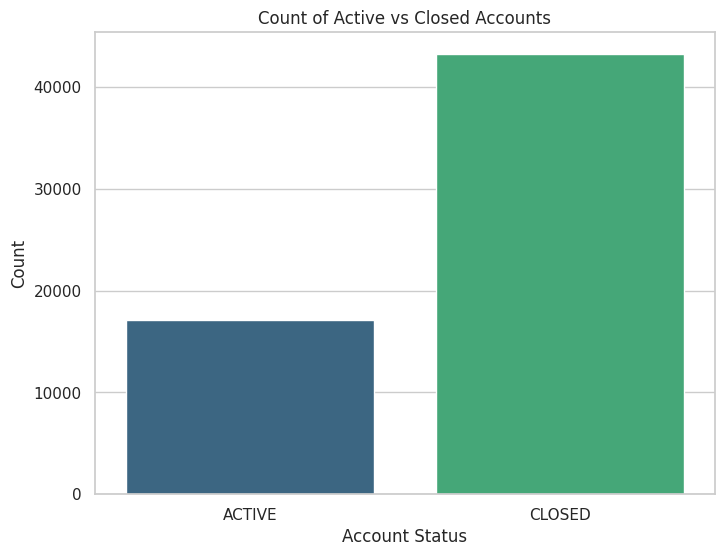

ACCOUNT_CATEGORY
CONSUMER LOAN       8734
PERSONAL LOAN       8693
CREDIT CARD         8687
HOUSING LOAN        8589
GOLD LOAN           8570
TWO-WHEELER LOAN    8561
AUTO LOAN           8547
Name: count, dtype: int64


<ipython-input-2-1697da2e1e4a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transaction_line, x='ACCOUNT_CATEGORY', palette='viridis', order=account_type_counts.index)


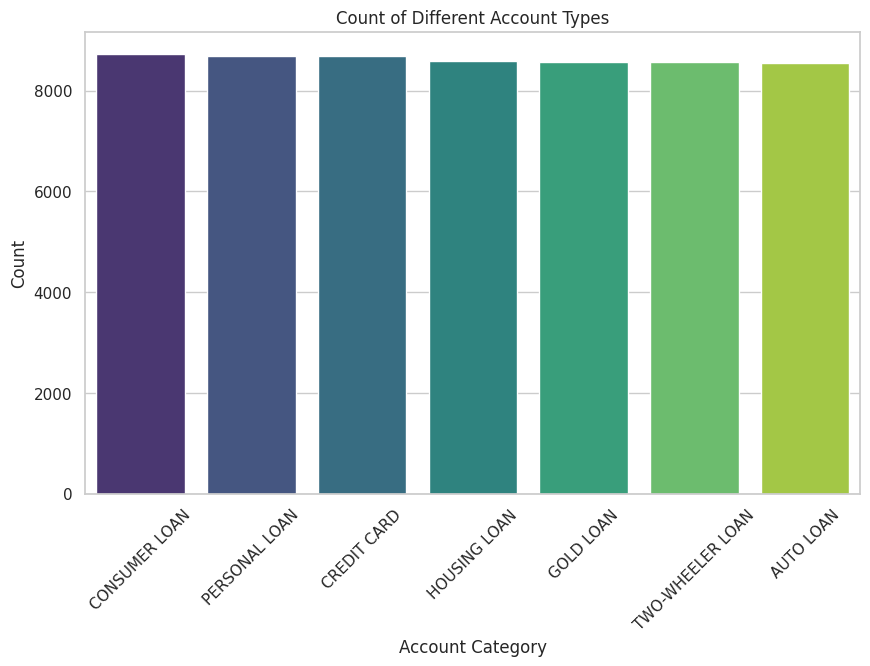

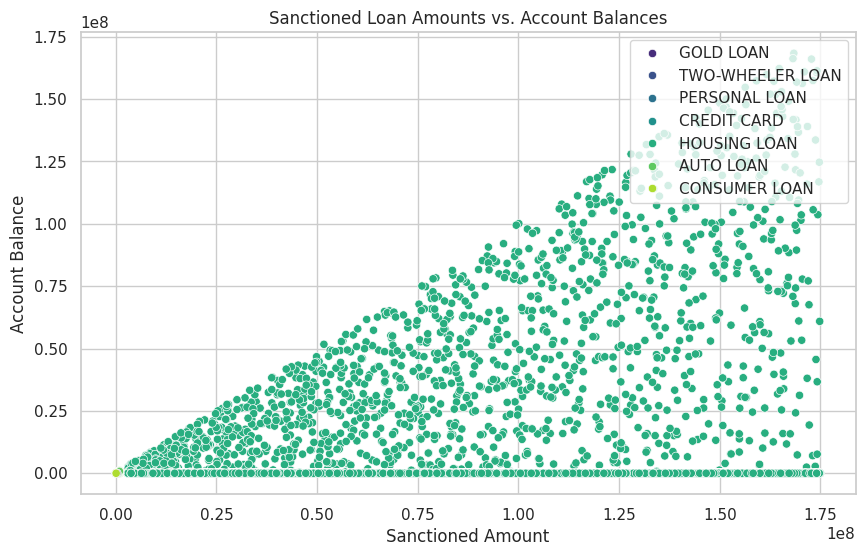

    ACCOUNT_CATEGORY OWNERSHIP_TYPE  CLOSURE_PERCENTAGE
0          AUTO LOAN     INDIVIDUAL           69.906977
1          AUTO LOAN  JOINT ACCOUNT           71.438663
2      CONSUMER LOAN     INDIVIDUAL           89.899227
3      CONSUMER LOAN  JOINT ACCOUNT           90.127602
4        CREDIT CARD     INDIVIDUAL           66.619751
5        CREDIT CARD  JOINT ACCOUNT           65.687161
6          GOLD LOAN     INDIVIDUAL           39.078578
7          GOLD LOAN  JOINT ACCOUNT           39.776432
8       HOUSING LOAN     INDIVIDUAL           70.781991
9       HOUSING LOAN  JOINT ACCOUNT           70.428016
10     PERSONAL LOAN     INDIVIDUAL           75.132519
11     PERSONAL LOAN  JOINT ACCOUNT           74.781810
12  TWO-WHEELER LOAN     INDIVIDUAL           89.603504
13  TWO-WHEELER LOAN  JOINT ACCOUNT           88.420554


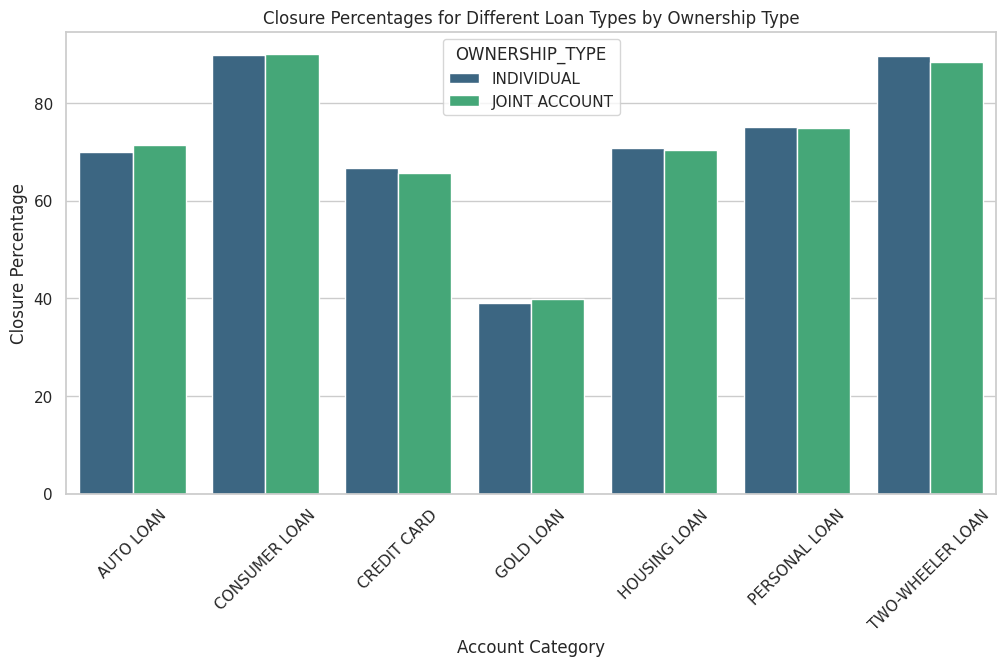

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Summary of active vs. closed accounts
account_status_counts = transaction_line['ACCOUNT_STATUS'].value_counts()
print(account_status_counts)

# Plotting active vs closed accounts
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_line, x='ACCOUNT_STATUS', palette='viridis')
plt.title('Count of Active vs Closed Accounts')
plt.xlabel('Account Status')
plt.ylabel('Count')
plt.show()

# Breakdown of account types and their current balances
account_type_counts = transaction_line['ACCOUNT_CATEGORY'].value_counts()
print(account_type_counts)

# Plotting account types
plt.figure(figsize=(10, 6))
sns.countplot(data=transaction_line, x='ACCOUNT_CATEGORY', palette='viridis', order=account_type_counts.index)
plt.title('Count of Different Account Types')
plt.xlabel('Account Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analysis of loan amounts vs. account balances
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transaction_line, x='SANCTIONED_AMOUNT', y='ACCOUNT_BALANCE', hue='ACCOUNT_CATEGORY', palette='viridis')
plt.title('Sanctioned Loan Amounts vs. Account Balances')
plt.xlabel('Sanctioned Amount')
plt.ylabel('Account Balance')
plt.legend(loc='upper right')
plt.show()

# Overview of the closure percentages for different loan types by ownership type
closure_percentage = transaction_line[transaction_line['ACCOUNT_STATUS'] == 'CLOSED'].groupby(['ACCOUNT_CATEGORY', 'OWNERSHIP_TYPE']).size() / transaction_line.groupby(['ACCOUNT_CATEGORY', 'OWNERSHIP_TYPE']).size() * 100
closure_percentage = closure_percentage.reset_index(name='CLOSURE_PERCENTAGE')
print(closure_percentage)

# Plotting closure percentages
plt.figure(figsize=(12, 6))
sns.barplot(data=closure_percentage, x='ACCOUNT_CATEGORY', y='CLOSURE_PERCENTAGE', hue='OWNERSHIP_TYPE', palette='viridis')
plt.title('Closure Percentages for Different Loan Types by Ownership Type')
plt.xlabel('Account Category')
plt.ylabel('Closure Percentage')
plt.xticks(rotation=45)
plt.show()


Creating Additional Variables & Customer Segmentations

We'll create some additional variables and perform customer segmentation based on different criteria such as FICO scores, account categories, and account activity.

Creating Additional Variables

Age of the account: Calculate the duration since the account opening date.
Credit utilization ratio: Calculate the ratio of the account balance to the highest credit.
Segmenting Customers

Segmenting customers based on FICO scores and account categories.
Product usage segmentation.
Account activity segmentation.


In [ ]:
from datetime import datetime

# Creating additional variables
# Age of the account
transaction_line['ACCOUNT_AGE'] = (datetime.now() - transaction_line['OPENING_DATE']).dt.days / 365.25

# Credit utilization ratio
transaction_line['CREDIT_UTILIZATION'] = transaction_line['ACCOUNT_BALANCE'] / transaction_line['HIGHEST_CREDIT']

# Segmenting customers based on FICO scores
fico_bins = [300, 580, 670, 740, 800, 850]
fico_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
transaction_line['FICO_SEGMENT'] = pd.cut(transaction_line['FICO_SCORE'], bins=fico_bins, labels=fico_labels, right=False)

# Segmenting customers based on account categories
account_category_segment = transaction_line.groupby('ACCOUNT_CATEGORY')['CUSTOMER_ID'].nunique().reset_index(name='CUSTOMER_COUNT')
print(account_category_segment)

# Product usage segmentation
product_usage_segment = transaction_line.groupby('ACCOUNT_CATEGORY')['SANCTIONED_AMOUNT'].sum().reset_index(name='TOTAL_SANCTIONED_AMOUNT')
print(product_usage_segment)

# Account activity segmentation
account_activity_segment = transaction_line.groupby(['CUSTOMER_ID', 'ACCOUNT_STATUS']).size().unstack(fill_value=0)
print(account_activity_segment)

# Save segmented data to new CSV files (optional)
transaction_line.to_csv('SEGMENTED_TRANSACTION_LINE.csv', index=False)


   ACCOUNT_CATEGORY  CUSTOMER_COUNT
0         AUTO LOAN            2816
1     CONSUMER LOAN            2778
2       CREDIT CARD            2794
3         GOLD LOAN            2800
4      HOUSING LOAN            2795
5     PERSONAL LOAN            2770
6  TWO-WHEELER LOAN            2773
   ACCOUNT_CATEGORY  TOTAL_SANCTIONED_AMOUNT
0         AUTO LOAN               4373906926
1     CONSUMER LOAN                505084387
2       CREDIT CARD                220285630
3         GOLD LOAN                257594895
4      HOUSING LOAN             759092661415
5     PERSONAL LOAN               2386288439
6  TWO-WHEELER LOAN               1664064433
ACCOUNT_STATUS  ACTIVE  CLOSED
CUSTOMER_ID                   
760                  4      12
1539                 8      14
4243                 7      20
11112                3      11
13800                9      18
...                ...     ...
9981355             12      18
9985788              4      23
9996822              1       9
9998904    

Cross-Selling Opportunities & Cohort Analysis

We'll identify cross-selling opportunities and perform cohort analysis to understand customer retention and behavior over time.

Cohort Analysis

Create cohorts based on the account opening date.
Analyze retention rates across different cohorts.
Cross-Selling Opportunities

Identify common account combinations.
Predict likely next products based on product holding patterns and customer behavior within cohorts.

In [ ]:
# Create cohorts based on the account opening date
transaction_line['COHORT_MONTH'] = transaction_line['OPENING_DATE'].dt.to_period('M')

# Cohort analysis: Analyzing retention rates
cohorts = transaction_line.groupby(['COHORT_MONTH', 'CUSTOMER_ID']).size().unstack(fill_value=0)
cohort_counts = cohorts.cumsum(axis=1)
cohort_sizes = cohorts.sum(axis=1)
retention_rates = cohort_counts.div(cohort_sizes, axis=0)
print(retention_rates)

# Plotting retention rates
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rates, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Months Since First Account Opening')
plt.ylabel('Cohort Month')
plt.show()

# Cross-Selling Opportunities: Identifying common account combinations
account_combinations = transaction_line.groupby('CUSTOMER_ID')['ACCOUNT_CATEGORY'].apply(lambda x: ', '.join(x.unique())).reset_index()
common_combinations = account_combinations['ACCOUNT_CATEGORY'].value_counts().reset_index(name='COUNT')
print(common_combinations)

# Save cohort and cross-selling data to new CSV files (optional)
retention_rates.to_csv('COHORT_RETENTION_RATES.csv')
common_combinations.to_csv('COMMON_ACCOUNT_COMBINATIONS.csv', index=False)

CUSTOMER_ID   760      1539     4243     11112     13800     15755    \
COHORT_MONTH                                                           
2004-05           0.0      0.0      0.0      0.0  0.000000  0.000000   
2004-06           0.0      0.0      0.0      0.0  0.000000  0.003846   
2004-07           0.0      0.0      0.0      0.0  0.000000  0.000000   
2004-08           0.0      0.0      0.0      0.0  0.000000  0.000000   
2004-09           0.0      0.0      0.0      0.0  0.000000  0.000000   
...               ...      ...      ...      ...       ...       ...   
2024-01           0.0      0.0      0.0      0.0  0.000000  0.000000   
2024-02           0.0      0.0      0.0      0.0  0.000000  0.000000   
2024-03           0.0      0.0      0.0      0.0  0.000000  0.003922   
2024-04           0.0      0.0      0.0      0.0  0.003802  0.003802   
2024-05           0.0      0.0      0.0      0.0  0.000000  0.000000   

CUSTOMER_ID    17709     20806     24060     30330    ...   997

**Report and Presentation**

In [ ]:
# Visualization 1: Count of Active vs Closed Accounts
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_line, x='ACCOUNT_STATUS', palette='viridis')
plt.title('Count of Active vs Closed Accounts')
plt.xlabel('Account Status')
plt.ylabel('Count')
plt.savefig('active_vs_closed_accounts.png')

In [ ]:
# Visualization 2: Count of Different Account Types
plt.figure(figsize=(10, 6))
account_type_counts = transaction_line['ACCOUNT_CATEGORY'].value_counts()
sns.countplot(data=transaction_line, x='ACCOUNT_CATEGORY', palette='viridis', order=account_type_counts.index)
plt.title('Count of Different Account Types')
plt.xlabel('Account Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('account_types.png')

In [ ]:
# Visualization 3: Sanctioned Loan Amounts vs Account Balances
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transaction_line, x='SANCTIONED_AMOUNT', y='ACCOUNT_BALANCE', hue='ACCOUNT_CATEGORY', palette='viridis')
plt.title('Sanctioned Loan Amounts vs Account Balances')
plt.xlabel('Sanctioned Amount')
plt.ylabel('Account Balance')
plt.legend(loc='upper right')
plt.savefig('loan_amounts_vs_balances.png')

In [ ]:
# Visualization 4: Closure Percentages for Different Loan Types by Ownership Type
closure_percentage = transaction_line[transaction_line['ACCOUNT_STATUS'] == 'CLOSED'].groupby(['ACCOUNT_CATEGORY', 'OWNERSHIP_TYPE']).size() / transaction_line.groupby(['ACCOUNT_CATEGORY', 'OWNERSHIP_TYPE']).size() * 100
closure_percentage = closure_percentage.reset_index(name='CLOSURE_PERCENTAGE')
plt.figure(figsize=(12, 6))
sns.barplot(data=closure_percentage, x='ACCOUNT_CATEGORY', y='CLOSURE_PERCENTAGE', hue='OWNERSHIP_TYPE', palette='viridis')
plt.title('Closure Percentages for Different Loan Types by Ownership Type')
plt.xlabel('Account Category')
plt.ylabel('Closure Percentage')
plt.xticks(rotation=45)
plt.savefig('closure_percentages.png')

In [ ]:
# Visualization 5: Cohort Analysis - Retention Rates

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
transaction_line = pd.read_csv('TRANSACTION_LINE.csv')
user_data = pd.read_csv('USER_DATA.csv')

# Data Cleaning for TRANSACTION_LINE
transaction_line['CLOSED_DATE'].fillna('01-01-2099', inplace=True)
transaction_line['OPENING_DATE'] = pd.to_datetime(transaction_line['OPENING_DATE'], format='%d-%m-%Y')
transaction_line['LAST_PAYMENT_DATE'] = pd.to_datetime(transaction_line['LAST_PAYMENT_DATE'], format='%d-%m-%Y')
transaction_line['CLOSED_DATE'] = pd.to_datetime(transaction_line['CLOSED_DATE'], format='%d-%m-%Y')

# Visualization 5: Cohort Analysis - Retention Rates
transaction_line['COHORT_MONTH'] = transaction_line['OPENING_DATE'].dt.to_period('M')
cohorts = transaction_line.groupby(['COHORT_MONTH', 'CUSTOMER_ID']).size().unstack(fill_value=0)
cohort_counts = cohorts.cumsum(axis=1)
cohort_sizes = cohorts.sum(axis=1)
retention_rates = cohort_counts.div(cohort_sizes, axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rates, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Months Since First Account Opening')
plt.ylabel('Cohort Month')
plt.savefig('cohort_retention_rates.png')


# **Report**

# Customer Segmentation Analysis

## 1. Introduction
Horizon Apex Bank, a subsidiary of Horizon Bancorp, Inc., serves both commercial and retail customers across India. The objective of this analysis is to segment the customer base to personalize marketing campaigns and improve customer engagement.

## 2. Methodology

### Data Collection
The data was collected from the `TRANSACTION_LINE` and `USER_DATA` datasets provided by Horizon Apex Bank.

### Data Cleaning and Preprocessing
- Filled missing values in the `CLOSED_DATE` column with a placeholder date.
- Converted date columns (`OPENING_DATE`, `LAST_PAYMENT_DATE`, `CLOSED_DATE`) to datetime objects.
- Removed duplicate entries.
- Normalized categorical data by stripping and converting to uppercase.

### Exploratory Data Analysis (EDA)
Conducted EDA to understand the distribution of account statuses, account types, loan amounts, and account balances.

### Customer Segmentation
- Segmented customers based on FICO scores.
- Categorized customers by the types of accounts they hold.
- Segmented customers by the status of their accounts (active or closed).

### Cohort Analysis
Performed cohort analysis to understand customer retention rates over time by grouping customers based on their account opening dates.

### Cross-Selling Opportunities
Identified potential cross-selling opportunities by analyzing common account combinations held by customers.

## 3. Key Findings

### Summary of Active vs Closed Accounts
![Active vs Closed Accounts](active_vs_closed_accounts.png)

### Breakdown of Account Types
![Account Types](account_types.png)

### Analysis of Loan Amounts vs Account Balances
![Loan Amounts vs Account Balances](loan_amounts_vs_balances.png)

### Closure Percentages by Ownership Type
![Closure Percentages](closure_percentages.png)

### Customer Segmentation by FICO Score
Customers were segmented into the following categories based on their FICO scores:
- Poor: 300-579
- Fair: 580-669
- Good: 670-739
- Very Good: 740-799
- Exceptional: 800-850

### Cohort Analysis Results
![Cohort Retention Rates](cohort_retention_rates.png)

### Cross-Selling Opportunities
Identified common account combinations and potential cross-selling products. Detailed analysis and common combinations are available in the report.

## 4. Recommendations

### Personalized Marketing Strategies
- Develop targeted marketing campaigns for each customer segment based on their FICO scores and product usage.
- Use customer segmentation data to tailor communication and offers to different groups.

### Enhancing Customer Engagement
- Implement personalized engagement strategies to retain customers and reduce account closure rates.
- Offer incentives and rewards for maintaining accounts and timely payments.

### Potential Cross-Selling Products
- Identify and offer relevant products to customers based on their current holdings and behavior patterns.
- Focus on customers with multiple account types for cross-selling opportunities.

## 5. Visual Aids
The following visualizations are included in this report to present the data clearly and effectively:

- **Summary of Active vs Closed Accounts**
![Active vs Closed Accounts](active_vs_closed_accounts.png)

- **Breakdown of Account Types**
![Account Types](account_types.png)

- **Analysis of Loan Amounts vs Account Balances**
![Loan Amounts vs Account Balances](loan_amounts_vs_balances.png)

- **Closure Percentages by Ownership Type**
![Closure Percentages](closure_percentages.png)

- **Cohort Analysis Results**
![Cohort Retention Rates](cohort_retention_rates.png)

---

The analysis and visualizations presented in this report provide valuable insights into customer behavior and opportunities for personalized marketing and customer engagement. By implementing the recommendations, Horizon Apex Bank can improve its marketing strategies, enhance customer satisfaction, and identify potential cross-selling opportunities.
